< GRUPO 7 >

PILAR ARIAS, ÁLVARO GARCÍA CID, YEDRA MARTÍN, AMAYA SARASA

# INSTALAMOS LA LIBRERÍA DEAP

Lo primero que debemos hacer es instalar la librería "deap", esta librería contiene los recursos apropiados para trabajar acerca de los algoritmos genéticos.
Además instalamos otras librerías que necesitaremos durante el desarrollo del ejercicio.

In [1]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 33.2 MB/s 


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 615 kB 28.9 MB/s 
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78119 sha256=189750f8c1f3de6d4e24070d2676c02aa7b0bfbe03cd8be61af2e01c5da9ada2
  Stored in directory: /root/.cache/pip/wheels/06/d1/b8/b4495d80f3aa67a67b8d19a900892d4f6af3c6d1bdd3cd015c
Successfully built scoop


In [6]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

Como los individuos que vamos a crear tienen dos genes, los cuales se encuentran entre los valores -100 y 100, creamos dos vectores de igual dimensión con valores aleatorios que se encuentren en este rango de valores.

In [45]:
random.seed(0)
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


In [46]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

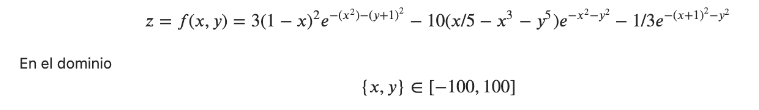

Para poder introducir correctamente esta función, se ha partido en diferentes segmentos para su correcta ejecución.

In [47]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res1 = (1-x[0])**2
    res2 = np.exp(-(x[0]**2+(x[1]+1)**2))
    res3 = x[0]/5-x[0]**3-x[1]**5
    res4 = np.exp(-(x[0]**2)-(x[1]**2))
    res5 = (1/3)*np.exp(-((x[0]+1)**2)-x[1]**2)
    res = 3* res1 * res2 - 10 * res3 * res4 - res5
    return res

Generamos vectores para comenzar la exploración del máximo de la función.

In [49]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

In [50]:
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Representamos la función para orientarnos sobre dónde estará ese máximo global que se está buscando.

Text(0.5, 0, 'f(x,y)')

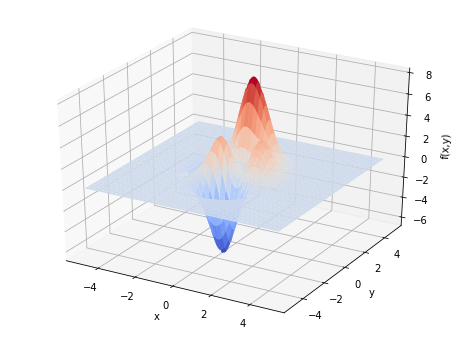

In [48]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

In [13]:
import random
from deap import base
from deap import creator
from deap import tools

Creamos la clase FitnessMax, que nos sirve para definir el problema y en el atributo weights, indicamos como valor 1.0 ya que se trata de un problema de maximización.

In [14]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

Creamos una nueva clase que será aquella que utilizaremos para guardar a los distintos individuos

In [15]:
creator.create("Individual", list, fitness=creator.FitnessMax)

Creamos una toolboz que será aquella que nos permitirá crear números aleatorios que utilizaremos para cada uno de los genes de los individuos creados. Estos genes tendrán valor entre -100 y 100

In [16]:
toolbox = base.Toolbox()

In [17]:
toolbox.register("attr_uniform", random.uniform, -100, 100)

Comenzamos a generar los individuos

In [19]:
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [20]:
individuo = toolbox.individual()
individuo

[45.96634965202574, 79.7676575935987]

In [21]:
individuo.fitness.values

()

Una vez visto como se genera cada individuo procedemos a crear una población que en este caso estará compuesta por 100 individuos.

In [22]:
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 100)

In [23]:
poblacion = toolbox.population()
print(poblacion)

[[36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885925, -83.91083628949292], [-35.98907906549084, 1.5881285041147777], [86.56676484538136, -78.18843081377926], [10.253449218110248, 41.312281973377935], [9.488182265684756, 62.8933726582672], [8.056721394064795, 92.76770919476019], [20.63712559227659, 17.52341283508727], [-11.00219474489677, 19.257372316621257], [-23.019770805467914, 15.130202832977702], [-41.934099519448395, -62.121734289128774], [-62.654094

In [24]:
poblacion[0]

[36.79678638308826, -5.571456909457325]

In [25]:
poblacion[0].fitness.values

()

Definimos la función objetivo de nuestro problema, en ella aplicaremos la pena de muerte a los individuos que no cumplan con las restricciones dandoles valor -1

In [26]:
def funcion_objetivo(x):
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res1 = (1-x[0])**2
    res2 = np.exp(-(x[0]**2+(x[1]+1)**2))
    res3 = x[0]/5-x[0]**3-x[1]**5
    res4 = np.exp(-(x[0]**2)-(x[1]**2))
    res5 = (1/3)*np.exp(-((x[0]+1)**2)-x[1]**2)
    res = 3* res1 * res2 - 10 * res3 * res4 - res5
    return res,


Registramos la función objetivo y comenzamos a evaluar los diversos individuos

In [27]:
toolbox.register("evaluate", funcion_objetivo)

Comprobamos el individuo generado

In [28]:
individuo

[45.96634965202574, 79.7676575935987]

In [29]:
funcion_objetivo(individuo)

(0.0,)

In [30]:
toolbox.evaluate(individuo)

(0.0,)

# Único punto de cruce 

En este primer caso el cruce entre los individuos se producirá en un único punto, la mutación de los genes se producirá mediante una probabilidad obtenida de la suma del indpb con un número aleatorio obtenido de una función de probabilidad Gaussiana con media 0 y desviación típica 5.
La forma de seleccionar los individuos será en forma de torneo, con un tamaño de 3 individuos.

In [31]:
toolbox.register("mate", tools.cxOnePoint)

In [32]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [33]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [34]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="upper center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [35]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

Obtenemos una tabla con los diversos valores que queremos estudiar para comprobar el funcionamiento del algoritmo, para ello establecemos que el número de generaciones que habrá serán 20.

<ipython-input-34-24c50d93197f>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01      	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	1.293

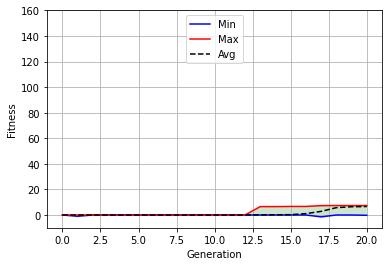

In [36]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

# Cruce con dos puntos

En este segundo caso el cruce entre los individuos se producirá en dos puntos, la mutación de los genes se producirá mediante una probabilidad obtenida de la suma del indpb con un número aleatorio obtenido de una función de probabilidad Gaussiana con media 0 y desviación típica 5.
La forma de seleccionar los individuos será en forma de torneo, con un tamaño de 3 individuos.

In [37]:
toolbox.register("mate", tools.cxTwoPoint)

In [38]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [39]:
toolbox.register("select", tools.selTournament, tournsize=3)

Obtenemos una tabla con los diversos valores que queremos estudiar para comprobar el funcionamiento del algoritmo, para ello establecemos que el número de generaciones que habrá serán 20.

<ipython-input-34-24c50d93197f>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	55    	9.69215e-50	4.2247e-49 	-5.6445e-140	1.93843e-48
2  	54    	-2.77757e-10	2.76365e-09	-2.77757e-08	9.62191e-38
3  	54    	1.39112e-25 	1.38414e-24	0           	1.39112e-23
4  	43    	-2.77757e-10	2.76365e-09	-2.77757e-08	1.39112e-23
5  	61    	9.2011e-15  	6.63727e-14	0           	5.84792e-13
6  	64    	-8.5687e-05 	0.000852575	-0.0085687  	5.84792e-13
7  	61    	0.00101441  	0.0100932  	4.41527e-65 	0.101441   
8  	51    	0.0653251   	0.617144   	-6.94448e-08	6.20338    
9  	55    	0.197282    	1.05693    	-6.23852e-14	6.20338    
10 	58    	0.617602    	1.87859    	-2.43588    	6.20338    
11 	59    	1.79351     	2.75949    	-9.91273e-17	6.20338    
12 	52    	4.34659     	2.78739    	-0.491237   	6.20338    
13 	66    	5.90065     	1.27026    	9.62e-33    	6.20338    
14 	60    	5.84401     	1.62766    	-4.9379     	6.20338    
15 	65    	5.86283     	1.5

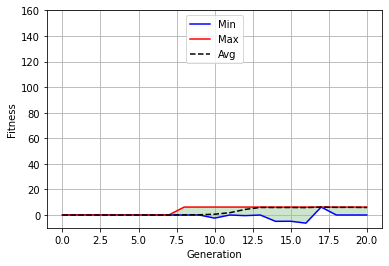

In [40]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

# Cruce uniforme

Ahora probaremos lo mismo que antes, pero con un cruce uniforme. Los atributos se intercambian según la probabilidad indpb, que en este caso, le hemos dado el valor de 0.4 La mutación de los genes se producirá mediante una probabilidad obtenida de la suma del indpb con un número aleatorio obtenido de una función de probabilidad Gaussiana con media 0 y desviación típica 5.
La forma de seleccionar los individuos será en forma de torneo, con un tamaño de 3 individuos.

In [41]:
toolbox.register("mate", tools.cxUniform, indpb=0.4)

In [42]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [43]:
toolbox.register("select", tools.selTournament, tournsize=3)

Obtenemos una tabla con los diversos valores que queremos estudiar para comprobar el funcionamiento del algoritmo, para ello establecemos que el número de generaciones que habrá serán 20.

<ipython-input-34-24c50d93197f>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	48    	1.16306e-49	4.60351e-49	0           	1.93843e-48
2  	58    	9.62191e-40	9.57368e-39	-8.02396e-118	9.62191e-38
3  	57    	-2.77757e-10	2.76365e-09	-2.77757e-08 	1.39112e-23
4  	57    	2.79554e-25 	1.94742e-24	-6.09907e-315	1.39112e-23
5  	53    	1.30985e-21 	1.30258e-20	6.05943e-77  	1.30915e-19
6  	66    	1.11789e-14 	7.83303e-14	1.93843e-48  	5.84792e-13
7  	58    	4.6272e-14  	1.56966e-13	-1.87111e-79 	5.84792e-13
8  	61    	1.45692e-13 	2.52369e-13	-2.42373e-67 	5.84792e-13
9  	60    	0.000145264 	0.00144536 	1.06184e-29  	0.0145264  
10 	59    	0.000145424 	0.00144534 	8.38211e-41  	0.0145264  
11 	63    	0.000720799 	0.00588412 	5.84792e-13  	0.0574737  
12 	60    	0.00613212  	0.0259094  	5.76469e-15  	0.224583   
13 	59    	0.0182194   	0.0441254  	5.84792e-13  	0.224583   
14 	55    	0.0851464   	0.581647   	-2.68795     	4.93978    
15 	67    	0.23

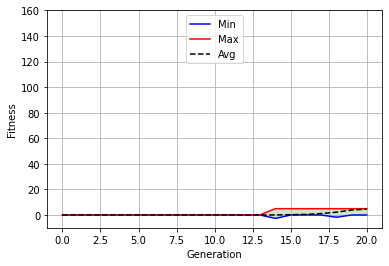

In [44]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

# Conclusiones finales

Tras haber implementado los tres tipos distintos de cruce a una serie de individuos creados que en este caso es 100, hemos obtenido las siguientes conclusiones tras haber pasado 20 generaciones.

Como se puede ver los tres casos comienzan con individuos cuyo valor de función objetivo es 0, esto se debe a que tal y como se ha visto en la representación inicial de la función los valores distintos de 0 de esta función que se está evaluando se encuentran en unos valores entre:

[-5 y 5, -5 y 5]

por lo que una gran cantidad de individuos que se pueden crear están fuera de estos valores en ambos genes.
A parte de esto, podemos ver como el caso en el cual se alcanza un valor máximo más alto es el caso de un punto de cruce, mientras que el peor es el caso de cruce uniforme.

A pesar de esto, se observa que el uso de dos puntos de cruce hace que la función converja hacia el máximo de forma más rápida ya que viendo las tres gráficas vemos como en el caso de dos puntos de cruce la media de valor de función objetivo de la población se situa casi en el máximo en la generación 12, mientras que los otros dos casos esto sucede casi en la generación 20.

Por tanto, se puede concluir que el cruce en dos puntos es mejor para obtener individuos mejor adaptados de una forma más rápida, pero es cierto que el cruce en un único punto, aunque sea de una forma más lenta consigue tener una población mejor adaptada que los otros dos casos.

